In [ ]:
#Principal Component Analysis
#Top 6 Feature
#SVM, Logistic Regression, K Nearest Neighbors

In [71]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/smoke_detection_iot.csv', index_col = 0)

In [72]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [73]:
X = data.drop(['Fire Alarm', 'UTC'], 1)
y = data['Fire Alarm']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [75]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

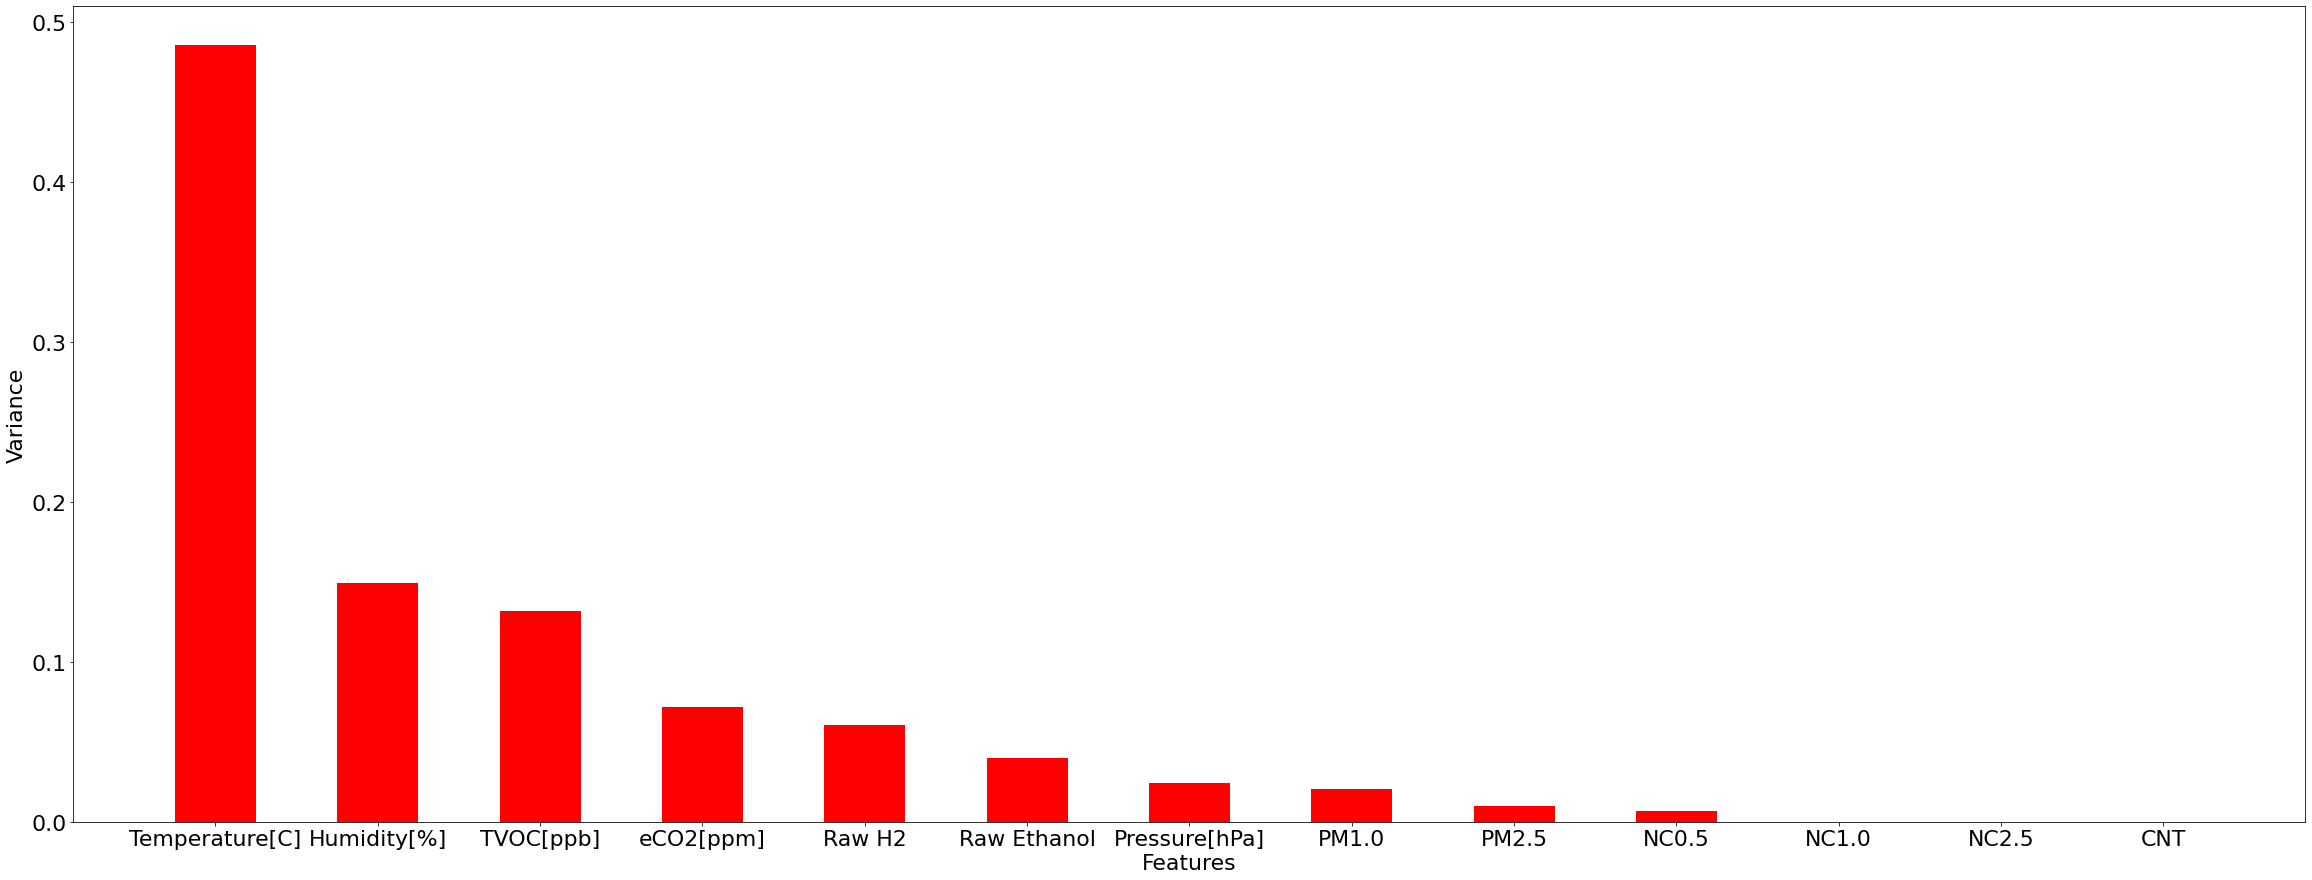

In [78]:
import matplotlib.pyplot as plt

features = X.columns
variances = pca.explained_variance_ratio_

fig = plt.figure(figsize = (40, 15))
plt.rcParams.update({'font.size': 22})
plt.bar(features, variances, color ='red', width = 0.5)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

In [79]:
#Lets ignore the last 5 features since there is not much varaince
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

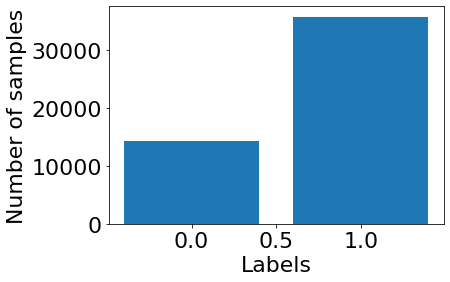

In [82]:
labels, count = np.unique(y_train, return_counts = True)
plt.figure()
plt.bar(labels, count)
plt.xlabel('Labels')
plt.ylabel('Number of samples')
plt.show()

In [84]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 5, 10]}
svc = svm.SVC()
model1 = GridSearchCV(svc, parameters)
model1.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

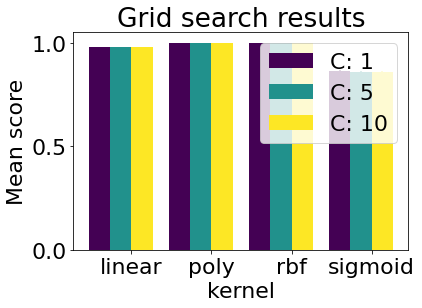

In [95]:
from sklearn_evaluation import plot
plot.grid_search(model1.cv_results_, change='kernel', kind='bar')

In [96]:
from sklearn.metrics import accuracy_score
y_pred = model1.predict(X_test)

print('The accuracy of best SVM is {:.3f}'.format(accuracy_score(y_pred, y_test)))

The accuracy of best SVM is 1.000


In [99]:
import pickle
pickle.dump(model1, open('SVM.sav', 'wb'))